### 2.3.5 결정트리

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import mglearn
import pandas as pd
import platform

In [32]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

In [33]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


In [35]:
tree=DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [36]:
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


In [37]:
# !pip install graphviz

In [38]:
import matplotlib.pyplot as plt

In [39]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['악성', '양성'], filled=True, feature_names=cancer.feature_names, impurity=False)



import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [40]:
# 글씨체
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수 가능
plt.rcParams['axes.unicode_minus'] = False 

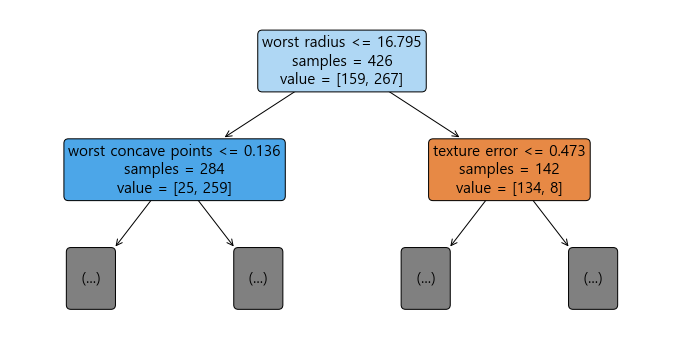

In [42]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, max_depth=1, filled=True, feature_names=cancer.feature_names,
          impurity=False, rounded=True, fontsize=15)
plt.show()

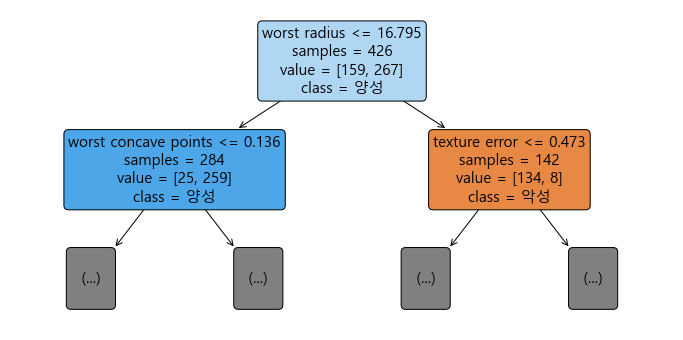

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=['악성', '양성'], max_depth=1, filled=True, feature_names=cancer.feature_names,
          impurity=False, rounded=True, fontsize=15)
plt.show()

In [12]:
print('특성 중요도:\n', tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [45]:
type(cancer)

sklearn.utils.Bunch

In [47]:
n_features = cancer.data.shape[1]
n_features

30

In [56]:
len(cancer.feature_names)

30

In [52]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

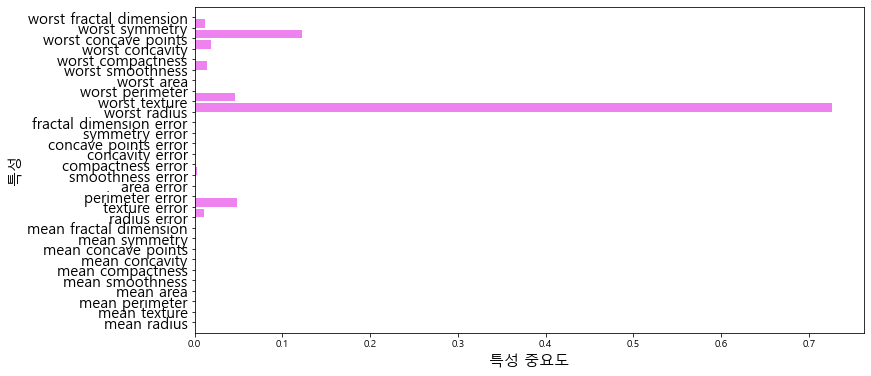

In [13]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(12,6))
    plt.barh(np.arange(n_features), model.feature_importances_, align='edge', color='violet')
    plt.yticks(np.arange(n_features), cancer.feature_names, fontsize=15)
    plt.xlabel('특성 중요도', fontsize=15)
    plt.ylabel('특성', fontsize=15)
    plt.ylim(-1, n_features)
    plt.show()
    
plot_feature_importances_cancer(tree)

In [14]:
cancer.data.shape[1]

30

In [15]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

Text(0, 0.5, '가격 ($/Mbyte)')

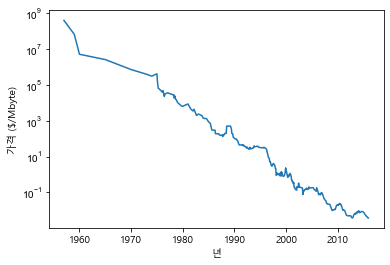

In [16]:
plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [18]:
X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


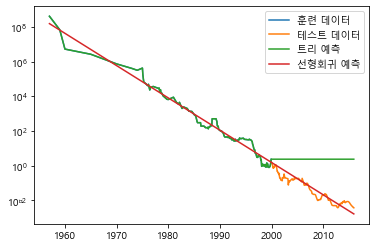

In [19]:
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측')
plt.legend()

In [20]:
tree.fit(data_train[['date']], y_train)
print('특성 개수 : ', tree.n_features_in_)
print('특성 이름 : ', tree.feature_names_in_)

특성 개수 :  1
특성 이름 :  ['date']
